In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
X_train.describe()

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,...,PAQ635,PAQ640,PAD645,PAQ650,PAQ655,PAD660,PAQ665,PAQ670,PAD675,PAD680
count,5955.000000,5876.000000,5869.000000,182.000000,81.000000,0.0,0.0,5857.000000,57.000000,5852.000000,...,4383.000000,1021.000000,1013.000000,4384.000000,1132.000000,1128.000000,4382.000000,1768.000000,1764.000000,4351.000000
mean,117105.594794,1.075221,73.297768,3.032967,101.114815,NaN,NaN,160.171846,2.333333,27.512662,...,1.766370,4.589618,59.065153,1.741788,3.333039,74.658688,1.596303,3.460973,61.689342,336.154447
std,4533.302880,0.350744,28.656998,0.362635,4.304884,NaN,NaN,18.249759,0.951190,8.266509,...,0.423188,1.933971,73.870090,0.437701,1.546636,52.843691,0.490694,1.716016,55.655307,205.244141
min,109270.000000,1.000000,11.700000,1.000000,90.300000,NaN,NaN,88.700000,1.000000,12.600000,...,1.000000,1.000000,10.000000,1.000000,1.000000,10.000000,1.000000,1.000000,10.000000,0.000000
25%,113140.000000,1.000000,56.600000,3.000000,97.800000,NaN,NaN,154.600000,1.000000,21.700000,...,2.000000,3.000000,20.000000,1.000000,2.000000,40.000000,1.000000,2.000000,30.000000,180.000000
50%,117141.000000,1.000000,73.100000,3.000000,101.900000,NaN,NaN,163.300000,3.000000,26.700000,...,2.000000,5.000000,30.000000,2.000000,3.000000,60.000000,2.000000,3.000000,45.000000,300.000000
75%,121050.500000,1.000000,89.800000,3.000000,104.400000,NaN,NaN,172.000000,3.000000,31.900000,...,2.000000,7.000000,60.000000,2.000000,4.000000,90.000000,2.000000,5.000000,60.000000,480.000000
max,124821.000000,3.000000,242.600000,4.000000,111.200000,NaN,NaN,198.400000,3.000000,86.200000,...,2.000000,7.000000,600.000000,2.000000,7.000000,480.000000,2.000000,7.000000,480.000000,1320.000000


In [4]:
# Correlation matrix too big with all features
# X_train.corr()

### Nulls by column

In [5]:
# Finding columns with large amount of missing values
X_len = len(X_train)

pcts = []
empty_cols = []
for col in X_train.columns:
    pct_null = X_train[col].isna().sum() / X_len
    pcts.append(pct_null)
    if (X_train[col].isna().sum() / X_len) > 0.2:
        empty_cols.append(col)

print(f"The number of columns with more than 40% of values missing is: {len(empty_cols)}")

The number of columns with more than 40% of values missing is: 76


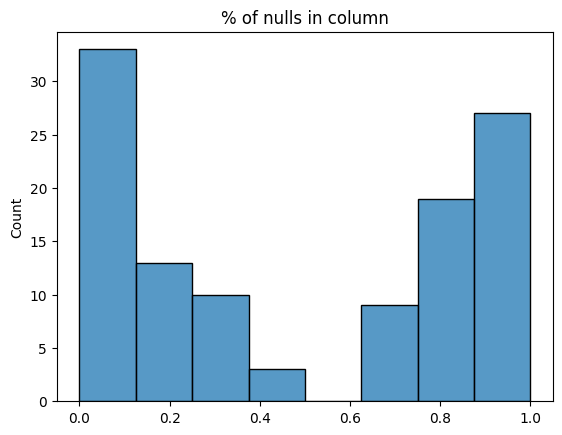

In [6]:
sns.histplot(data=pcts)
plt.title('% of nulls in column')
plt.show()

### Correlations

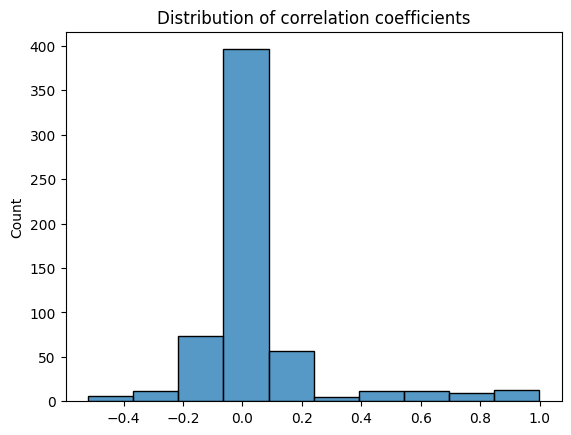

In [7]:
# dropping mostly empty columns and plotting correlation coefficients

X_train2 = X_train.drop(empty_cols, axis=1)
X_test = X_test.drop(empty_cols, axis=1)
corr = X_train2.corr()
upper_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
unique_corr_pairs = upper_corr.unstack().dropna()
corrs = unique_corr_pairs.sort_values(ascending=False)
sns.histplot(data=corrs, bins=10)
plt.title('Distribution of correlation coefficients')
plt.show()

In [8]:
corrs = corrs.to_frame()

#### Highest postive correlated features

In [9]:
for i in range(10):
    x = corrs[i:i+1][0]
    print(x ,'\n')

WTMECPRP  WTINTPRP    0.998038
Name: 0, dtype: float64 

RIDRETH3  RIDRETH1    0.965371
Name: 0, dtype: float64 

BMXARMC  BMXWT    0.947488
Name: 0, dtype: float64 

BMXWAIST  BMXWT    0.940388
Name: 0, dtype: float64 

BMXHIP  BMXBMI    0.939898
Name: 0, dtype: float64 

BMXARML  BMXHT    0.937284
Name: 0, dtype: float64 

BMXWAIST  BMXBMI    0.930847
Name: 0, dtype: float64 

BMXBMI  BMXWT    0.915072
Name: 0, dtype: float64 

BMXARMC  BMXBMI    0.909714
Name: 0, dtype: float64 

BMXWAIST  BMXARMC    0.908424
Name: 0, dtype: float64 



#### Highest negative correlated features

In [10]:
corrs2 = corrs.sort_values(by=0, ascending=True)
for i in range(10):
    x = corrs2[i:i+1][0]
    print(x ,'\n')

SIALANG  RIDRETH1   -0.518834
Name: 0, dtype: float64 

FIALANG  RIDRETH1   -0.512323
Name: 0, dtype: float64 

SIALANG  RIDRETH3   -0.451176
Name: 0, dtype: float64 

FIALANG  RIDRETH3   -0.444426
Name: 0, dtype: float64 

RIAGENDR  BMXLEG   -0.43946
Name: 0, dtype: float64 

MIALANG  RIDRETH1   -0.411191
Name: 0, dtype: float64 

MIALANG  RIDRETH3   -0.357289
Name: 0, dtype: float64 

DBQ197  SIAPROXY   -0.330649
Name: 0, dtype: float64 

SIAINTRP  DMDBORN4   -0.311374
Name: 0, dtype: float64 

RIAGENDR  BMXHT   -0.292064
Name: 0, dtype: float64 



### Target value information

In [11]:
y_train.LBXCOT.describe()

count    5955.000000
mean       36.757563
std       106.431136
min         0.011000
25%         0.011000
50%         0.028000
75%         0.444500
max      1520.000000
Name: LBXCOT, dtype: float64

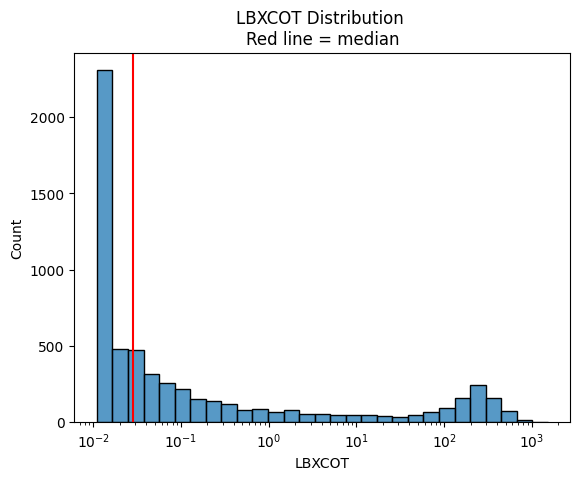

In [12]:
sns.histplot(data=y_train, x="LBXCOT",log_scale=True)
plt.title('LBXCOT Distribution \nRed line = median')
plt.axvline(x=y_train.LBXCOT.median(), color='red')
plt.show()

#### Target value outliers

In [13]:
y_outliers = y_train[(np.abs(stats.zscore(y_train.LBXCOT)) > 3)]
print(f'The number of outliers is {len(y_outliers)}')

The number of outliers is 168


In [14]:
y_outliers

,SEQN,LBXCOT
132,109629.0,399.0
138,109638.0,515.0
148,109666.0,555.0
178,109765.0,590.0
194,109812.0,1520.0
...,...,...
5733,124477.0,595.0
5774,124579.0,399.0
5836,124737.0,559.0
5863,124798.0,384.0


### Outlier detection

In [15]:
### feature values for the y outliers
y_outliers = y_outliers.merge(X_train2, on='SEQN', how='left')
y_outliers.to_csv('y_outliers.csv', index=False)
y_outliers

,SEQN,LBXCOT,BMDSTATS,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,...,WTMECPRP,SDMVPSU,SDMVSTRA,INDFMPIR,DBQ197,DBD895,DBD905,DBD910,SMD460,INDFMMPC
0,109629.0,399.0,1.0,67.6,185.5,19.6,44.8,40.0,28.0,82.8,...,9557.272239,1.0,152.0,1.51,1.0,7.0,0.0,0.0,1.0,2.0
1,109638.0,515.0,1.0,115.8,162.9,43.6,36.0,38.5,42.4,128.2,...,116101.632791,1.0,158.0,3.03,1.0,5.0,0.0,0.0,1.0,3.0
2,109666.0,555.0,2.0,116.9,153.2,49.8,NaN,NaN,NaN,NaN,...,10591.370664,1.0,150.0,0.83,3.0,0.0,0.0,3.0,0.0,1.0
3,109765.0,590.0,1.0,65.7,150.8,28.9,32.2,32.0,30.7,94.0,...,24203.214044,1.0,158.0,0.80,3.0,18.0,0.0,0.0,2.0,1.0
4,109812.0,1520.0,1.0,59.7,150.3,26.4,37.4,33.2,30.4,86.5,...,8564.919715,1.0,159.0,4.85,0.0,4.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,124477.0,595.0,1.0,58.4,177.7,18.5,40.0,42.6,26.7,79.6,...,14901.707858,1.0,152.0,1.66,2.0,1.0,0.0,0.0,1.0,3.0
164,124579.0,399.0,1.0,61.8,176.5,19.8,39.8,36.4,27.3,73.4,...,39042.400417,1.0,160.0,NaN,1.0,7.0,4.0,1.0,0.0,2.0
165,124737.0,559.0,1.0,69.3,181.2,21.1,44.1,41.2,28.5,87.9,...,3053.357640,1.0,150.0,0.20,2.0,0.0,0.0,8.0,2.0,1.0
166,124798.0,384.0,1.0,77.1,172.3,26.0,42.8,39.5,33.0,95.3,...,12189.213468,2.0,169.0,0.80,2.0,1.0,2.0,0.0,1.0,1.0


In [16]:
outlier_dict = {}
for col in X_train2.columns:
    # out = X_train2[X_train2[col] > 3*np.std(X_train2[col])]
    out = X_train2[(np.abs(stats.zscore(X_train2[col])) > 3)]
    outlier_dict[col] = len(out)

outlier_dict

{'SEQN': 0,
 'BMDSTATS': 0,
 'BMXWT': 0,
 'BMXHT': 0,
 'BMXBMI': 0,
 'BMXLEG': 0,
 'BMXARML': 0,
 'BMXARMC': 0,
 'BMXWAIST': 0,
 'BMXHIP': 0,
 'SDDSRVYR': 0,
 'RIDSTATR': 0,
 'RIAGENDR': 0,
 'RIDAGEYR': 0,
 'RIDRETH1': 0,
 'RIDRETH3': 0,
 'RIDEXMON': 0,
 'DMDBORN4': 0,
 'SIALANG': 0,
 'SIAPROXY': 0,
 'SIAINTRP': 208,
 'FIALANG': 0,
 'FIAPROXY': 0,
 'FIAINTRP': 0,
 'MIALANG': 0,
 'MIAPROXY': 0,
 'MIAINTRP': 0,
 'WTINTPRP': 144,
 'WTMECPRP': 141,
 'SDMVPSU': 0,
 'SDMVSTRA': 0,
 'INDFMPIR': 0,
 'DBQ197': 0,
 'DBD895': 0,
 'DBD905': 0,
 'DBD910': 0,
 'SMD460': 0,
 'INDFMMPC': 0}

In [17]:
### Outlier column 1
print(X_train.SIAINTRP.describe())
print(X_train2.SIAINTRP.describe())

print('\nNumber of Nan:', X_train2.SIAINTRP.isna().sum())

count    5955.000000
mean        1.965071
std         0.183614
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: SIAINTRP, dtype: float64
count    5955.000000
mean        1.965071
std         0.183614
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: SIAINTRP, dtype: float64

Number of Nan: 0


In [18]:
### Outlier column 2
print(X_train.WTINTPRP.describe())
print(X_train2.WTINTPRP.describe())

print('\nNumber of Nan:', X_train2.WTINTPRP.isna().sum())

count      5955.000000
mean      20957.093705
std       25170.816635
min        1620.616041
25%        7739.445702
50%       13220.362429
75%       23394.304553
max      311265.152122
Name: WTINTPRP, dtype: float64
count      5955.000000
mean      20957.093705
std       25170.816635
min        1620.616041
25%        7739.445702
50%       13220.362429
75%       23394.304553
max      311265.152122
Name: WTINTPRP, dtype: float64

Number of Nan: 0


In [19]:
### Outlier column 3
print(X_train.WTMECPRP.describe())
print(X_train2.WTMECPRP.describe())

print('\nNumber of Nan:', X_train2.WTMECPRP.isna().sum())

count      5955.000000
mean      22648.306661
std       27230.420696
min        1817.426919
25%        8318.141815
50%       14083.471087
75%       25334.849512
max      321573.519227
Name: WTMECPRP, dtype: float64
count      5955.000000
mean      22648.306661
std       27230.420696
min        1817.426919
25%        8318.141815
50%       14083.471087
75%       25334.849512
max      321573.519227
Name: WTMECPRP, dtype: float64

Number of Nan: 0


In [20]:
print(X_train.SDDSRVYR.value_counts())
print(X_train2.SDDSRVYR.value_counts())

print('\nNumber of Nan:', X_train2.SDDSRVYR.isna().sum())

66.0    5955
Name: SDDSRVYR, dtype: int64
66.0    5955
Name: SDDSRVYR, dtype: int64

Number of Nan: 0


In [21]:
print(X_train.RIDSTATR.value_counts())
print(X_train2.RIDSTATR.value_counts())
print('\nNumber of Nan:', X_train2.RIDSTATR.isna().sum())

2.0    5955
Name: RIDSTATR, dtype: int64
2.0    5955
Name: RIDSTATR, dtype: int64

Number of Nan: 0


In [22]:
print(X_train.RIDEXMON.value_counts())
print(X_train2.RIDEXMON.value_counts())
print('\nNumber of Nan:', X_train2.RIDEXMON.isna().sum())

1.0    5955
Name: RIDEXMON, dtype: int64
1.0    5955
Name: RIDEXMON, dtype: int64

Number of Nan: 0


In [23]:
print(X_train.MIAPROXY.value_counts())
print(X_train2.MIAPROXY.value_counts())
print('\nNumber of Nan:', X_train2.MIAPROXY.isna().sum())

2.0    5167
1.0      43
Name: MIAPROXY, dtype: int64
2.0    5167
1.0      43
Name: MIAPROXY, dtype: int64

Number of Nan: 745


In [24]:
### What is this column? The 6666 seems odd
X_train2.DBD910.sort_values(ascending=False)[:10]

1375    6666.0
531     6666.0
1045    6666.0
1535    6666.0
5539    6666.0
234     6666.0
5360      90.0
3722      90.0
4441      90.0
5726      68.0
Name: DBD910, dtype: float64

<AxesSubplot: >

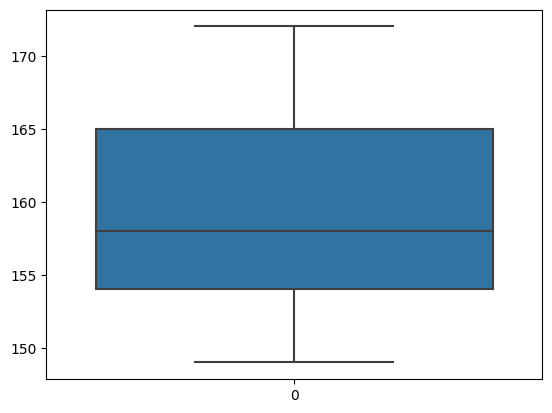

In [25]:
sns.boxplot(X_train2.SDMVSTRA)

### Feature selction/engineering

In [26]:
X_train2['DBD910'] = X_train2['DBD910'].replace(6666, 91)

In [27]:
#log transforming to bring smallest value down to 0. must do this at the end too when making predictions
y_train['LBXCOT'] = np.log1p(y_train.LBXCOT)
y_test['LBXCOT'] = np.log1p(y_test.LBXCOT)

In [28]:
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)
X_train2[:] = imp_mean.fit_transform(X_train2)
X_train2 = X_train2.round(1)
imp_mean = IterativeImputer(random_state=0)
X_test[:] = imp_mean.fit_transform(X_test)
X_test = X_test.round(1)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lin = LinearRegression()
lin.fit(X_train2, y_train['LBXCOT'])
y_pred = lin.predict(X_test)
print(r2_score(y_test['LBXCOT'], y_pred))
print(mean_squared_error(y_test['LBXCOT'], y_pred))
print(mean_absolute_error(y_test['LBXCOT'], y_pred))

0.2650956576439044
3.0825193956533092
1.179374121065536


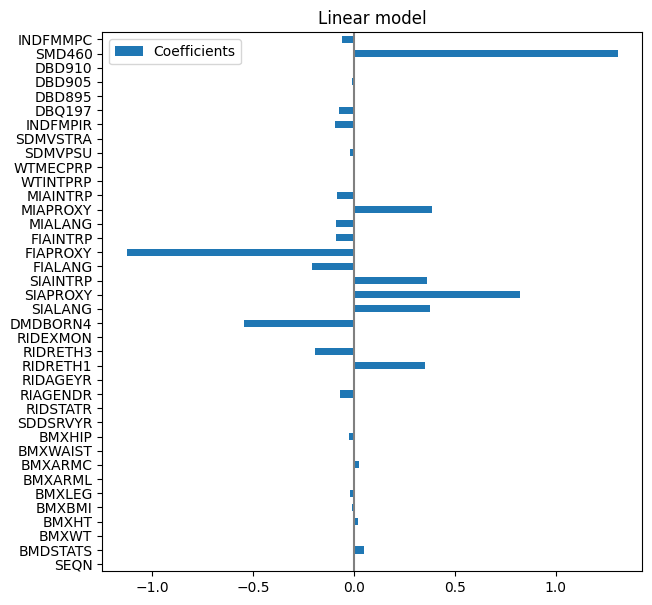

In [30]:
coefs = pd.DataFrame(
   lin.coef_,
   columns=['Coefficients'], index=X_train2.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Linear model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [31]:
important_features = ['SEQN', 'INDFMMPC', 'SMD460', 'DBD905', 'DBQ197', 'INDFMPIR',
'MIAINTRP', 'MIAPROXY', 'MIALANG', 'FIAINTRP', 'FIAPROXY', 'FIALANG', 'DMDBORN4', 
'RIDRETH3', 'RIDRETH1', 'RIAGENDR', 'BMXARMC', 'BMXHIP', 'BMXLEG', 'BMXBMI',
'BMXHT']
X_train = X_train2[important_features]
X_test = X_test[important_features]

In [32]:
# INDFMMPC = Family monthly poverty level category
# 1 - below poverty, 2 - within poverty, 3 - above poverty
# SMD460 = # of people who live here smoke tobacco (cont)
# DBD905 = # of ready-to-eat foods in past 30 days (continuous)
# DBQ197 = Past 30 day milk product consumption
# 0 - never, 1 - less than once a week, 2 - once a week or more
# , less than once a day, 3 - once a day or more, 4 - varied
# INDFMPIR - Ratio of family income to poverty (continuous)
# MIAINTRP - Interpreter used in MEC Interview?
# 1 yes, 2 no
# MIAPROXY - Proxy used in MEC Interview?
# 1 yes, 2 no
# MIALANG - Language of MEC Interview
# 1 english 2 spanish
# FIAINTRP - Interpreter used in Family Interview? 
# cat
# FIAPROXY - Proxy used in Family Interview?
# cat
# FIALANG - Language of Family Interview
# cat
# DMDBORN4 - Country of birth
# 1 born in US 2 born somewhere else
# RIDRETH3 - Race/Hispanic origin w/ NH Asian
# 1 mexican american 2 other hispanic 3 nh white 4 nh black 6 nh asian
# RIDRETH1 - Race/Hispanic origin
# 1 mexican american 2 other hispanic 3 nh white 4 nh black 5 other
# RIAGENDR = gender
# 1 male 2 female
# BMXARMC = arm circumfrence cm (cont)
# BMXHIP - hip circum cm (cont)
# BMXLEG - leg circum cm (cont)
# BMXHT - standing height (cm) (cont)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['SMD460', 'DBD905', 'INDFMPIR', 'BMXARMC', 'BMXHIP', 'BMXLEG', 'BMXHT']] = scaler.fit_transform(X_train[['SMD460', 'DBD905', 'INDFMPIR', 'BMXARMC', 'BMXHIP', 'BMXLEG', 'BMXHT']])
X_test[['SMD460', 'DBD905', 'INDFMPIR', 'BMXARMC', 'BMXHIP', 'BMXLEG', 'BMXHT']] = scaler.transform(X_test[['SMD460', 'DBD905', 'INDFMPIR', 'BMXARMC', 'BMXHIP', 'BMXLEG', 'BMXHT']])


/tmp/ipykernel_73/2315551975.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['SMD460', 'DBD905', 'INDFMPIR', 'BMXARMC', 'BMXHIP', 'BMXLEG', 'BMXHT']] = scaler.fit_transform(X_train[['SMD460', 'DBD905', 'INDFMPIR', 'BMXARMC', 'BMXHIP', 'BMXLEG', 'BMXHT']])
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is tr

In [34]:
#no one hot encoding since the categorical features are already numbers

In [35]:
lin1 = LinearRegression()
lin1.fit(X_train, y_train['LBXCOT'])
y_pred = lin1.predict(X_test)
r2_score(y_test['LBXCOT'], y_pred)

0.33902036466718644

In [36]:
#trying base model again with outliers dropped
#seqntodrop = list(y_outliers['SEQN'])
#X_train = X_train[~X_train['SEQN'].isin(seqntodrop)]
#y_train = y_train[~y_train['SEQN'].isin(seqntodrop)]
lin1 = LinearRegression()
lin1.fit(X_train, y_train['LBXCOT'])
y_pred = lin1.predict(X_test)
r2_score(y_test['LBXCOT'], y_pred)
#r2 score without outliers is 32% while r2 score with outliers is 34%,
#we should keep

0.33902036466718644

In [37]:
len(X_train2.columns)

38

In [38]:
len(X_train.columns)

21

## Model Selection

### DummyRegressor

In [39]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(X_train, y_train['LBXCOT'])

y_pred = dummy_regr.predict(X_test)

print(r2_score(y_test['LBXCOT'], y_pred))
print(mean_squared_error(y_test['LBXCOT'], y_pred))
print(mean_absolute_error(y_test['LBXCOT'], y_pred))

-0.009213715541813938
4.233096300048253
1.5125717733219597


### Linear Regression (Basic)

In [40]:
lin1 = LinearRegression()
lin1.fit(X_train, y_train['LBXCOT'])
y_pred = lin1.predict(X_test)
print(r2_score(y_test['LBXCOT'], y_pred))
print(mean_squared_error(y_test['LBXCOT'], y_pred))
print(mean_absolute_error(y_test['LBXCOT'], y_pred))

0.33902036466718644
2.772445920666493
1.1743594681731755


### Linear Regression (Lasso)

In [41]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=0.1).fit(X_train, y_train['LBXCOT'])
y_pred = linlasso.predict(X_test)
print(r2_score(y_test['LBXCOT'], y_pred))
print(mean_squared_error(y_test['LBXCOT'], y_pred))
print(mean_absolute_error(y_test['LBXCOT'], y_pred))

0.028999737502379608
4.072811888330167
1.4779610063481494


### Linear Regression (Ridge)

In [42]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha=0.1).fit(X_train, y_train['LBXCOT'])
y_pred = linridge.predict(X_test)
print(r2_score(y_test['LBXCOT'], y_pred))
print(mean_squared_error(y_test['LBXCOT'], y_pred))
print(mean_absolute_error(y_test['LBXCOT'], y_pred))

0.33280735680670404
2.798506070445828
1.1927366027686384


### Linear Regression w/Polynomial Feature Expansion

In [43]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
lin = LinearRegression()
lin.fit(X_poly, y_train['LBXCOT'])
X_poly_test = poly_reg.transform(X_test)
y_pred = lin.predict(X_poly_test)

print(r2_score(y_test['LBXCOT'], y_pred))
print(mean_squared_error(y_test['LBXCOT'], y_pred))
print(mean_absolute_error(y_test['LBXCOT'], y_pred))

-0.033233551609507694
4.333846297417574
1.091997941246973


### Zero-Inflated Regressor

In [44]:
! pip install sklego

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.9/230.9 KB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 97.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 83.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 49.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=37b3d36efd5d8b96921bafe499dabcaa737d7a7f7d665535b90ebcde8ad2c60e
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55512 sh

In [52]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklego.meta import ZeroInflatedRegressor


zir = ZeroInflatedRegressor(
    classifier=RandomForestClassifier(random_state=0),
    regressor=RandomForestRegressor(max_features = 'log2', criterion = 'friedman_mse',random_state=0)
)

zir.fit(X_train, y_train['LBXCOT'])

y_pred = zir.predict(X_test)
print(r2_score(y_test['LBXCOT'], y_pred))
print(mean_squared_error(y_test['LBXCOT'], y_pred))
print(mean_absolute_error(y_test['LBXCOT'], y_pred))



0.38545334055690283
2.5776851327262853
1.0572930431645025


### Gradient Boosting

In [ ]:
! pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 6.6 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:linear")

xgb_model.fit(X_train, y_train['LBXCOT'])

y_pred = xgb_model.predict(X_test)

print(r2_score(y_test['LBXCOT'], y_pred))
print(mean_squared_error(y_test['LBXCOT'], y_pred))
print(mean_absolute_error(y_test['LBXCOT'], y_pred))

[21:39:41] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
0.31792214464294877
2.860941346111892
1.087055374689484


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b11c49bc-c566-41df-9c50-539e3edd8da3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>